We start with a csv (comma-separated-value) file that is output from the DoubleMu dataset from the CMS experiment. The data was collected in 2011.

The selections used on the two muons:
* |$\eta$| < 2.4
* opposite charge
* 0.3 < $M_{\mu\mu}$ < 300 GeV 
* at least one of the muons is a global muon

Let's calculate the invariant mass $M$ of the two muons where:

$M = \sqrt{2p_{t}^{1}p_{t}^{2}(\cosh(\eta_{1}-\eta_{2}) - \cos(\phi_{1}-\phi_{2}))}$

In [72]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/DoubleMuRun2011A.csv')

In [122]:
# Let's select events where both muons are global muons:
gms = df[(df.Type1 == 'G') & (df.Type2 == 'G')]
# Calculate the invariant mass:
m = np.sqrt(2*gms['pt1']*gms['pt2']*(np.cosh(gms['eta1']-gms['eta2']) - np.cos(gms['phi1']-gms['phi2'])))

nbins = 500
weights = [nbins/np.log(10)/m for m in m]
m = np.log10(m)

M_hist = np.histogram(m, bins=nbins, weights=weights, range=(-0.5,2.5))

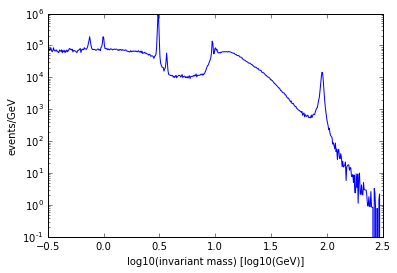

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = M_hist
width = 0.5*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.plot(center, hist)
plt.yscale('log')
plt.xlabel('log10(invariant mass) [log10(GeV)]')
plt.ylabel('events/GeV')
plt.show()